MISC DERIVATIVE Scipy

Dada la función
$f(x)=sin(x)+tan^2(x)$

Dominio
$x=[x_{min},x_{max}]$

mis derivative $x=x_0$

In [1]:
import sympy as sp
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pylab as plt

Función trivial para ver si funciona correctamente

In [2]:
f=lambda x:x**2
df= lambda x:2*x

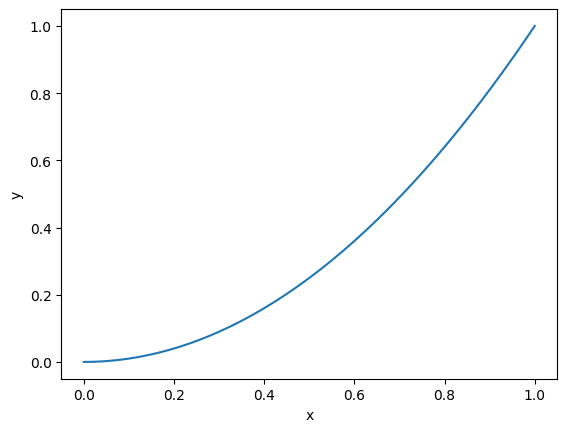

In [3]:
x=np.linspace(0,1,100)
plt.plot(x,f(x))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
a=1
x=np.linspace(0,0,1)

In [5]:
misc.derivative(f,0.5)

<ipython-input-5-5d2b318449a1>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  misc.derivative(f,0.5)


1.0

In [6]:
#comprobar
df(0.5)

1.0

<ipython-input-7-b198b56bbd12>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x,misc.derivative(f,x),".",label="Numerica")


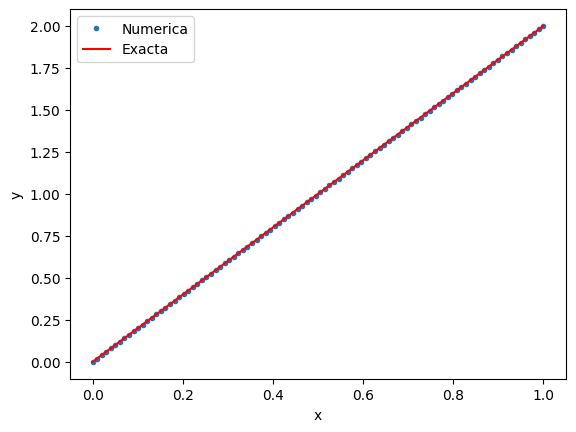

In [7]:
x=np.linspace(0,1,100)
plt.plot(x,misc.derivative(f,x),".",label="Numerica")
plt.plot(x,df(x),"-r",label="Exacta")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

 Para la función

 $f(x)=sin(x)+tan^2(x)$

In [8]:
f=lambda x,a:a*np.sin(x)+(np.tan(x))**2

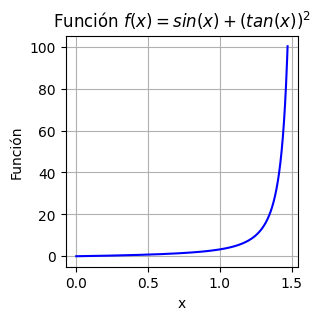

In [9]:
epsilon=0.1
a=1
plt.figure(figsize=(3,3))
x=np.linspace(0,(np.pi/2)-epsilon,1000)
plt.plot(x,f(x,a),"-b")
#plt.plot(x,)
plt.xlabel("x")
plt.ylabel("Función")
plt.title("Función $f(x)=sin(x)+(tan(x))^2$")
plt.grid(True)
plt.show()

In [10]:
a=1
g= misc.derivative(f, x, dx=0.1, args=(a,))

<ipython-input-10-7ebf31767a6b>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  g= misc.derivative(f, x, dx=0.1, args=(a,))


In [11]:
dx=x[1]-x[0]

<ipython-input-12-b6f1b93e0786>:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  g= misc.derivative(f, x, dx=0.0001, args=(a,))
<ipython-input-12-b6f1b93e0786>:11: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  g= misc.derivative(f, x, dx=dx, args=(a,))


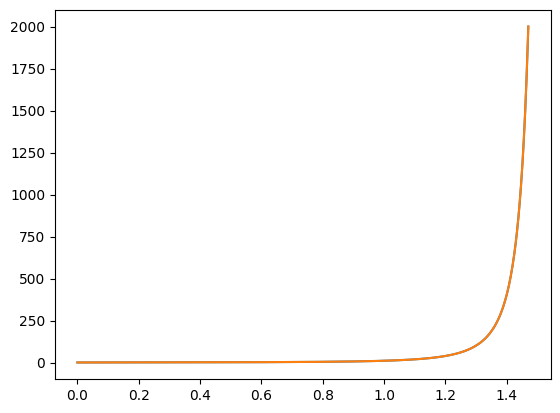

In [12]:
a=1
#g= misc.derivative(f, x, dx=0.1, args=(a,))
#plt.plot(x,g)

a=1
g= misc.derivative(f, x, dx=0.0001, args=(a,))
plt.plot(x,g)


a=1
g= misc.derivative(f, x, dx=dx, args=(a,))
plt.plot(x,g)

In [13]:
#Función de seno y tangente sympy
x=sp.Symbol("x")
a=sp.Symbol("a")
b=sp.Symbol("b")
fs=lambda x: a*sp.sin(x)+b*(sp.tan(x))**2
fs(x)

a*sin(x) + b*tan(x)**2

In [14]:
fp=sp.diff(fs(x),x)
fp

a*cos(x) + b*(2*tan(x)**2 + 2)*tan(x)

In [15]:
#usando la función scipy

f_=lambda x_,a,b: a*sp.sin(x_)+b*(sp.tan(x_))**2

#Derivada analítica
dev_= lambda x_,a,b:a*cos(x_) + b*(2*tan(x_)**2 + 2)*tan(x_)

interv_x_=np.linspace(0.0001,np.pi/2 -0.4,1000)

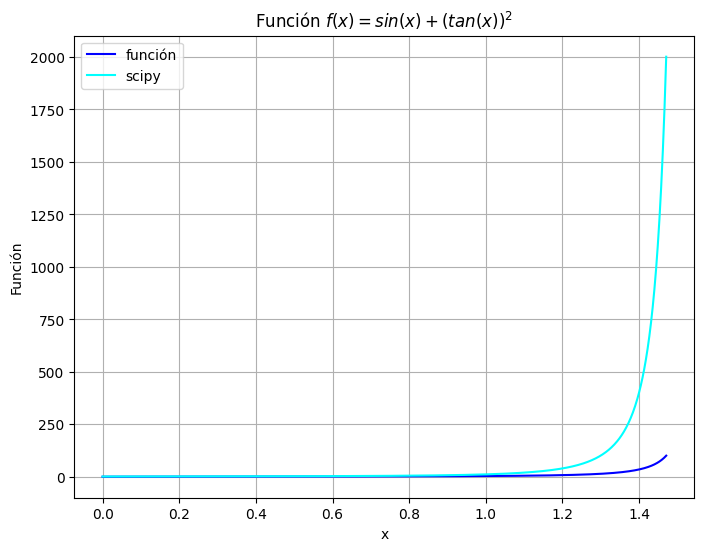

In [16]:
epsilon=0.1
a=1
plt.figure(figsize=(8,6))
x=np.linspace(0,(np.pi/2)-epsilon,1000)
plt.plot(x,f(x,a),"-b", label="función")
plt.plot(x,g,"aqua", label="scipy")
plt.xlabel("x")
plt.ylabel("Función")
plt.legend()
plt.title("Función $f(x)=sin(x)+(tan(x))^2$")
plt.grid(True)
plt.show()

-------------------------------------------------------------

In [17]:
#pag 180 del pdf del burden
#Ciclos y luego vectorizado

In [18]:
#Función de prueba
f= lambda x: x**2
dev1=lambda x:2*x
def derivada_num(f,x):
    h=abs((x[0]-x[-1])/len(x))
    fp_=np.zeros(len(x))


    for i in range(len(x)):
        x0=x[i]
        fp=1/(2*h)*(f(x0+h)-f(x0-h))
        fp_[i]=fp
    return fp_

In [19]:
#Parámetro
x_=np.linspace(0,4,100)

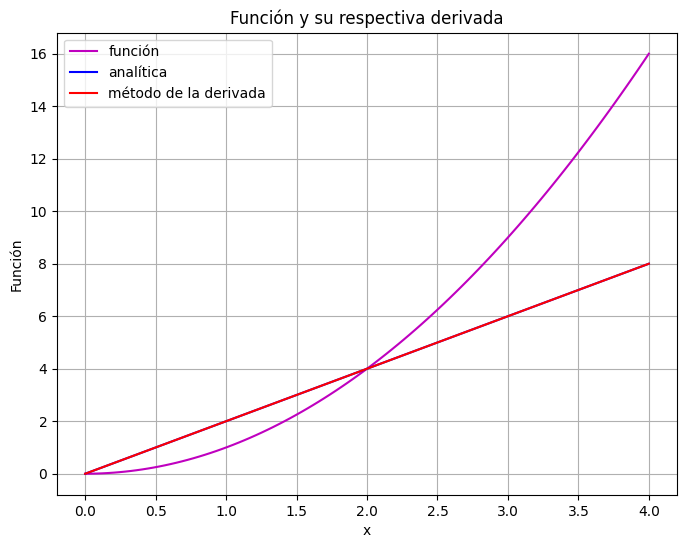

In [20]:
plt.figure(figsize=(8,6))
plt.plot(x_,f(x_),"-m",label="función")
plt.plot(x_,dev1(x_),"-b", label="analítica")

plt.plot(x_,derivada_num(f,x_),"-r", label="método de la derivada")
plt.xlabel("x")
plt.ylabel("Función")
plt.legend()
plt.title("Función y su respectiva derivada")
plt.grid(True)
plt.show()

In [21]:
def derivada_general(f,xmin,xmax,salto):
    interv_x=np.linspace(xmin,xmax,salto)
    h1=(xmax-xmin)/(salto-1)
    devg=np.zeros(len(interv_x))

    for i in range(0, len(interv_x)):
        x0=interv_x[i]
        fp__=1/(2*(h1))*(f(x0+h1)-f(x0-h1))
        devg[i]=fp__
    return devg

#Ejemplo
dev_def=derivada_general(f,0,6,100)
#dev_def

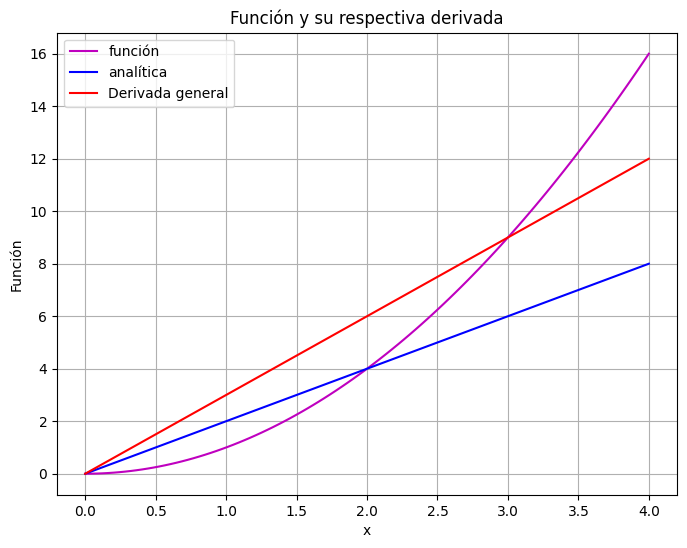

In [22]:
plt.figure(figsize=(8,6))
plt.plot(x_,f(x_),"-m",label="función")
plt.plot(x_,dev1(x_),"-b", label="analítica")
plt.plot(x_,dev_def,"-r", label="Derivada general")
plt.xlabel("x")
plt.ylabel("Función")
plt.legend()
plt.title("Función y su respectiva derivada")
plt.grid(True)
plt.show()